# Project dari Andra
Berikut adalah isi email yang ditugaskan oleh Andra:

 

Diberikan dataset ‘retail_raw_test.csv’

Baca dataset
Tipe data diubah menjadi tipe yang seharusnya
customer_id dari string ke int64,
quantity dari string ke int64,
item_price dari string ke int64
transform product_value supaya bentuknya seragam dengan format PXXXX, assign ke kolom baru "product_id", dan drop kolom "product_value", jika terdapat nan gantilah dengan "unknown".
trasnform order_date menjadi value dengan format YYYY-mm-dd
cek data hilang dari tiap kolom dan kemudian isi missing value
di brand dengan "no_brand", dan
cek dulu bagaimana missing value di city & province - isi missing value di city dan province dengan "unknown"
create column city/province dari gabungan city & province
membuat index berdasarkan city_provice, order_date, customer_id, order_id, product_id (cek index)
membuat kolom "total_price" sebagai hasil perkalian quantity dengan item_price
slice data hanya untuk Jan 2019
Notes :

Dataset :  https://storage.googleapis.com/dqlab-dataset/retail_raw_test.csv

Preview akhir data:
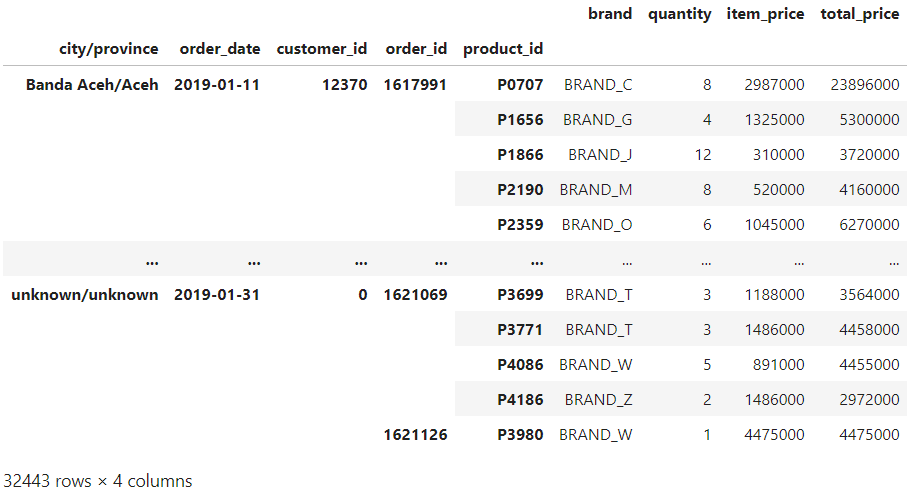

JAWABAN

In [2]:
import pandas as pd

# 1. Baca dataset
print("[1] BACA DATASET")
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_test.csv", low_memory=False)
print("    Dataset:\n", df.head())
print("    Info:\n", df.info())

# 2. Ubah tipe data
print("\n[2] UBAH TIPE DATA")
df["customer_id"] = df['customer_id'].apply(lambda x: x.split("'")[1]).astype("int64")
df["quantity"] = df["quantity"].apply(lambda x: x.split("'")[1]).astype("int64")
df["item_price"] = df["item_price"].apply(lambda x: x.split("'")[1]).astype("int64")
print("    Tipe data:\n", df.dtypes)

# 3. Transform "product_value" supaya bentuknya seragam dengan format "PXXXX", assign ke kolom baru "product_id", dan drop kolom "product_value", jika terdapat nan gantilah dengan "unknown"
print("\n[3] TRANSFORM product_value MENJADI product_id")
# Buat fungsi
import math
def impute_product_value(val):
    if math.isnan(val):
        return "unknown"
    else:
        return 'P' + '{:0>4}'.format(str(val).split('.')[0])
# Buat kolom "product_id"
df["product_id"] = df["product_value"].apply(lambda x: impute_product_value(x))
# Hapus kolom "product_value"
df.drop(["product_value"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 4. Tranform order_date menjadi value dengan format "YYYY-mm-dd"
print("\n[4] TRANSFORM order_date MENJADI FORMAT YYYY-mm-dd")
months_dict = {
   "Jan":"01",
   "Feb":"02",
   "Mar":"03",
   "Apr":"04",
   "May":"05",
   "Jun":"06",
   "Jul":"07",
   "Aug":"08",
   "Sep":"09",
   "Oct":"10",
   "Nov":"11",
   "Dec":"12"
}
df["order_date"] = pd.to_datetime(df['order_date'].apply(lambda x: str(x)[-4:] + "-" + months_dict[str(x)[:3]] + "-" + str(x)[4:7]))
print("    Tipe data:\n", df.dtypes)

# 5. Mengatasi data yang hilang di beberapa kolom
print("\n[5] HANDLING MISSING VALUE")
# Kolom "city" dan "province" masih memiliki missing value, nilai yang hilang di kedua kolom ini diisi saja dengan "unknown"
df[["city","province"]] = df[["city","province"]].fillna("unknown")
# Kolom brand juga masih memiliki missing value, Ganti value NaN menjadi "no_brand"
df["brand"] = df["brand"].fillna("no_brand")
# Cek apakah masih terdapat missing value di seluruh kolom 
print("    Info:\n", df.info())

# 6. Membuat kolom baru "city/province" dengan menggabungkan kolom "city" dan kolom "province" dan delete kolom asalnya
print("\n[6] MEMBUAT KOLOM BARU city/province")
df["city/province"] = df["city"] + "/" + df["province"]
# drop kolom "city" dan "province" karena telah digabungkan
df.drop(["city","province"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 7. Membuat hierarchical index yang terdiri dari kolom "city/province", "order_date", "customer_id", "order_id", "product_id"
print("\n[7] MEMBUAT HIERACHICAL INDEX")
df = df.set_index(["city/province","order_date","customer_id","order_id","product_id"])
# urutkanlah berdasarkan index yang baru
df = df.sort_index()
# Cetak 5 data teratas
print(df.head())

# 8. Membuat kolom "total_price" yang formula nya perkalian antara kolom "quantity" dan kolom "item_price"
print("\n[8] MEMBUAT KOLOM total_price")
df["total_price"] = df["quantity"] * df["item_price"]
# Cetak 5 data teratas
print(df.head())

# 9. Slice dataset agar hanya terdapat data bulan Januari 2019
print("\n[9] SLICE DATASET UNTUK BULAN JANUARI 2019 SAJA")
idx = pd.IndexSlice
df_jan2019 = df.loc[idx[:, "2019-01-01":"2019-01-31"], :]
print("Dataset akhir:\n", df_jan2019)

# END OF PROJECT

[1] BACA DATASET
    Dataset:
    order_id    order_date customer_id           city     province    brand  \
0   1730350  Dec 11, 2019      '13447      Surakarta  Jawa Tengah  BRAND_F   
1   1677490  Jul 31, 2019          '0            NaN          NaN  BRAND_F   
2   1704211  Oct 18, 2019      '16128  Jakarta Pusat  DKI Jakarta  BRAND_H   
3   1679695  Aug 07, 2019      '16225     Yogyakarta   Yogyakarta  BRAND_H   
4   1679080  Aug 05, 2019          '0            NaN          NaN  BRAND_E   

  quantity item_price  product_value  
0      '24    '113000         1374.0  
1       '1   '1164000         1370.0  
2      '12    '747000         1679.0  
3       '6    '590000         1708.0  
4       '2    '740000         1201.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       5000 non-null   int64  
 1   order_date     5000 non